## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import energyefficiencyDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 8
n_samples= 768
n_target = 1 

In [6]:
X,Y = energyefficiencyDataset.energy_data()

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.037906
0:	learn: 0.9700971	total: 61.7ms	remaining: 1m 1s
1:	learn: 0.9378667	total: 61.9ms	remaining: 30.9s
2:	learn: 0.9108325	total: 62ms	remaining: 20.6s
3:	learn: 0.8804417	total: 62.3ms	remaining: 15.5s
4:	learn: 0.8558971	total: 62.4ms	remaining: 12.4s
5:	learn: 0.8282053	total: 62.6ms	remaining: 10.4s
6:	learn: 0.8022854	total: 62.8ms	remaining: 8.91s
7:	learn: 0.7764854	total: 63.1ms	remaining: 7.82s
8:	learn: 0.7507069	total: 63.3ms	remaining: 6.97s
9:	learn: 0.7272747	total: 63.6ms	remaining: 6.29s
10:	learn: 0.7038099	total: 63.7ms	remaining: 5.73s


11:	learn: 0.6819137	total: 66.3ms	remaining: 5.46s
12:	learn: 0.6606218	total: 67.7ms	remaining: 5.14s
13:	learn: 0.6405484	total: 68.2ms	remaining: 4.8s
14:	learn: 0.6201682	total: 68.7ms	remaining: 4.51s
15:	learn: 0.6022688	total: 69.4ms	remaining: 4.27s
16:	learn: 0.5839241	total: 70ms	remaining: 4.05s
17:	learn: 0.5658481	total: 70.4ms	remaining: 3.84s
18:	learn: 0.5487959	total: 70.7ms	remaining: 3.65s
19:	learn: 0.5336222	total: 71.1ms	remaining: 3.48s
20:	learn: 0.5211311	total: 71.3ms	remaining: 3.33s
21:	learn: 0.5062603	total: 71.7ms	remaining: 3.19s
22:	learn: 0.4927297	total: 72.1ms	remaining: 3.06s
23:	learn: 0.4777058	total: 72.7ms	remaining: 2.96s
24:	learn: 0.4654044	total: 73.3ms	remaining: 2.86s
25:	learn: 0.4524995	total: 73.8ms	remaining: 2.76s
26:	learn: 0.4398824	total: 74.3ms	remaining: 2.68s
27:	learn: 0.4282525	total: 74.8ms	remaining: 2.6s
28:	learn: 0.4147192	total: 75.5ms	remaining: 2.53s
29:	learn: 0.4021306	total: 76ms	remaining: 2.46s
30:	learn: 0.39087

191:	learn: 0.0423634	total: 153ms	remaining: 644ms
192:	learn: 0.0420979	total: 155ms	remaining: 647ms
193:	learn: 0.0420136	total: 155ms	remaining: 645ms
194:	learn: 0.0418896	total: 155ms	remaining: 642ms
195:	learn: 0.0417791	total: 156ms	remaining: 639ms
196:	learn: 0.0416106	total: 156ms	remaining: 636ms
197:	learn: 0.0414786	total: 157ms	remaining: 634ms
198:	learn: 0.0413744	total: 157ms	remaining: 633ms
199:	learn: 0.0412930	total: 158ms	remaining: 631ms
200:	learn: 0.0411358	total: 158ms	remaining: 629ms
201:	learn: 0.0408902	total: 159ms	remaining: 627ms
202:	learn: 0.0407562	total: 159ms	remaining: 626ms
203:	learn: 0.0405103	total: 160ms	remaining: 624ms
204:	learn: 0.0403892	total: 160ms	remaining: 622ms
205:	learn: 0.0401378	total: 161ms	remaining: 620ms
206:	learn: 0.0398799	total: 161ms	remaining: 619ms
207:	learn: 0.0397333	total: 162ms	remaining: 618ms
208:	learn: 0.0396011	total: 163ms	remaining: 616ms
209:	learn: 0.0394903	total: 163ms	remaining: 614ms
210:	learn: 

289:	learn: 0.0313196	total: 206ms	remaining: 503ms
290:	learn: 0.0312758	total: 206ms	remaining: 502ms
291:	learn: 0.0312057	total: 207ms	remaining: 501ms
292:	learn: 0.0311142	total: 208ms	remaining: 502ms
293:	learn: 0.0310075	total: 208ms	remaining: 500ms
294:	learn: 0.0309574	total: 208ms	remaining: 498ms
295:	learn: 0.0308890	total: 209ms	remaining: 497ms
296:	learn: 0.0308521	total: 209ms	remaining: 495ms
297:	learn: 0.0307642	total: 210ms	remaining: 494ms
298:	learn: 0.0307154	total: 210ms	remaining: 493ms
299:	learn: 0.0306458	total: 211ms	remaining: 492ms
300:	learn: 0.0305546	total: 211ms	remaining: 491ms
301:	learn: 0.0305105	total: 212ms	remaining: 490ms
302:	learn: 0.0304123	total: 212ms	remaining: 489ms
303:	learn: 0.0303442	total: 213ms	remaining: 487ms
304:	learn: 0.0302610	total: 213ms	remaining: 486ms
305:	learn: 0.0302326	total: 214ms	remaining: 485ms
306:	learn: 0.0301931	total: 214ms	remaining: 484ms
307:	learn: 0.0301216	total: 215ms	remaining: 483ms
308:	learn: 

487:	learn: 0.0218187	total: 301ms	remaining: 315ms
488:	learn: 0.0217852	total: 301ms	remaining: 315ms
489:	learn: 0.0217638	total: 302ms	remaining: 314ms
490:	learn: 0.0217170	total: 307ms	remaining: 318ms
491:	learn: 0.0216977	total: 308ms	remaining: 318ms
492:	learn: 0.0216539	total: 309ms	remaining: 317ms
493:	learn: 0.0216129	total: 310ms	remaining: 318ms
494:	learn: 0.0215905	total: 311ms	remaining: 317ms
495:	learn: 0.0215641	total: 311ms	remaining: 316ms
496:	learn: 0.0215426	total: 311ms	remaining: 315ms
497:	learn: 0.0215036	total: 311ms	remaining: 314ms
498:	learn: 0.0214900	total: 312ms	remaining: 314ms
499:	learn: 0.0214642	total: 313ms	remaining: 313ms
500:	learn: 0.0214308	total: 313ms	remaining: 312ms
501:	learn: 0.0213967	total: 313ms	remaining: 311ms
502:	learn: 0.0213775	total: 313ms	remaining: 310ms
503:	learn: 0.0213528	total: 314ms	remaining: 309ms
504:	learn: 0.0213209	total: 314ms	remaining: 308ms
505:	learn: 0.0213045	total: 314ms	remaining: 307ms
506:	learn: 

656:	learn: 0.0178918	total: 387ms	remaining: 202ms
657:	learn: 0.0178741	total: 387ms	remaining: 201ms
658:	learn: 0.0178628	total: 388ms	remaining: 201ms
659:	learn: 0.0178453	total: 388ms	remaining: 200ms
660:	learn: 0.0178296	total: 388ms	remaining: 199ms
661:	learn: 0.0178196	total: 389ms	remaining: 198ms
662:	learn: 0.0178072	total: 389ms	remaining: 198ms
663:	learn: 0.0177861	total: 389ms	remaining: 197ms
664:	learn: 0.0177787	total: 390ms	remaining: 196ms
665:	learn: 0.0177547	total: 390ms	remaining: 196ms
666:	learn: 0.0177422	total: 390ms	remaining: 195ms
667:	learn: 0.0177213	total: 391ms	remaining: 194ms
668:	learn: 0.0176992	total: 391ms	remaining: 193ms
669:	learn: 0.0176844	total: 391ms	remaining: 193ms
670:	learn: 0.0176735	total: 392ms	remaining: 192ms
671:	learn: 0.0176435	total: 392ms	remaining: 191ms
672:	learn: 0.0176198	total: 393ms	remaining: 191ms
673:	learn: 0.0176043	total: 393ms	remaining: 190ms
674:	learn: 0.0175850	total: 394ms	remaining: 189ms
675:	learn: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.022201645427633903
ABC Pre-generator MAE 0.11814977449046533


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

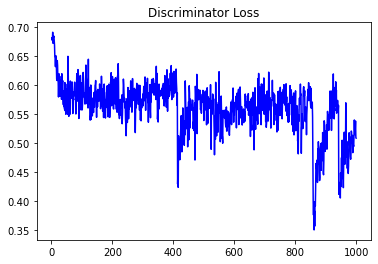

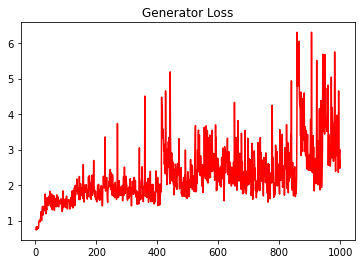

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.18382421731174767


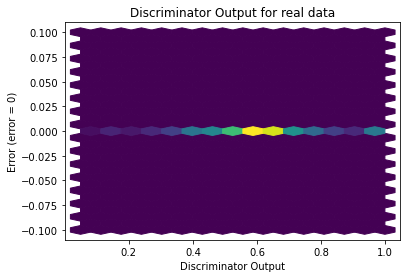

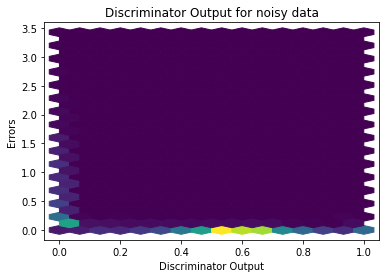

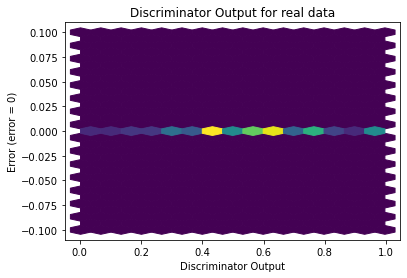

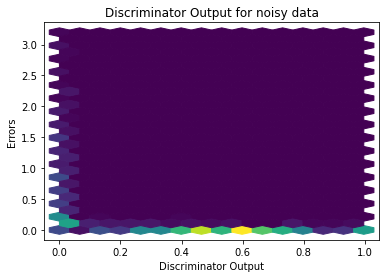

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


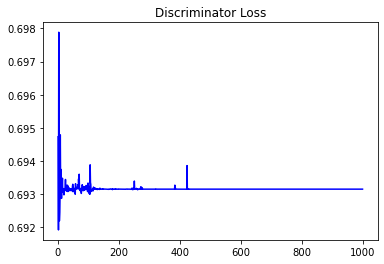

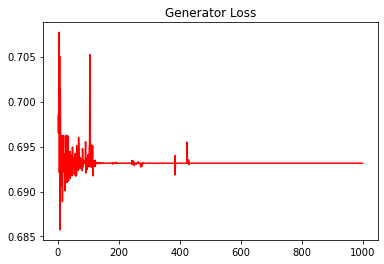

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.13195270584968777


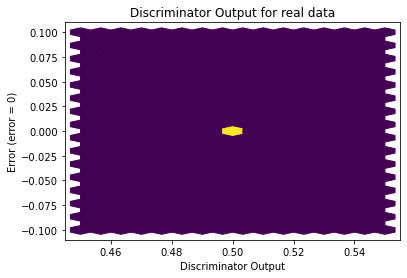

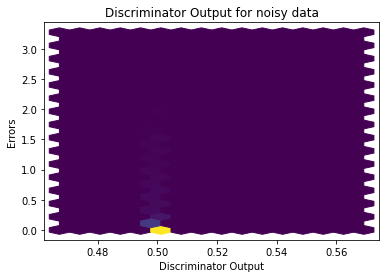

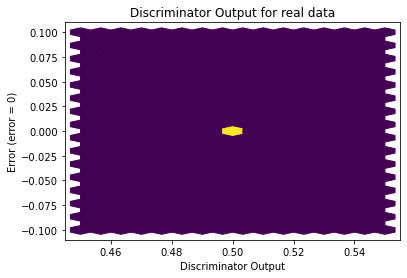

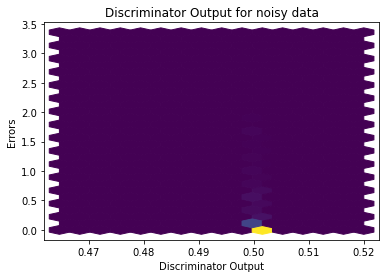

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


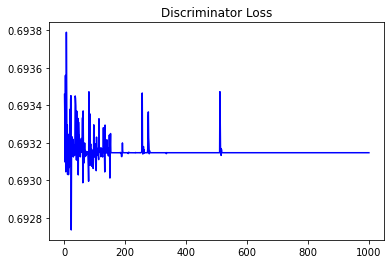

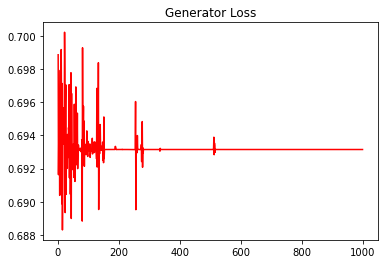

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.11513910232362785


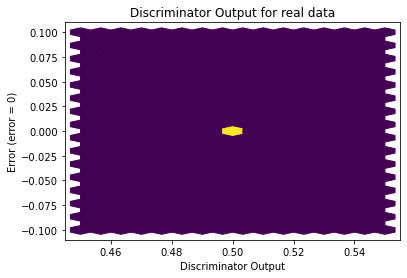

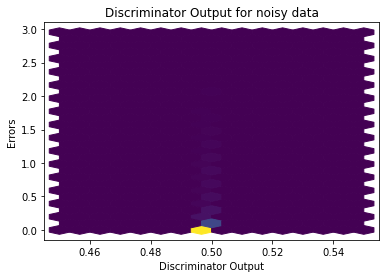

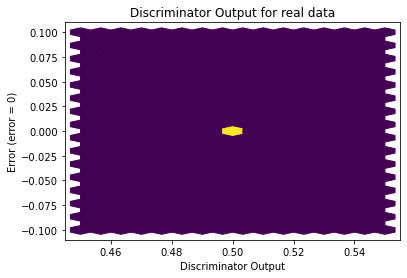

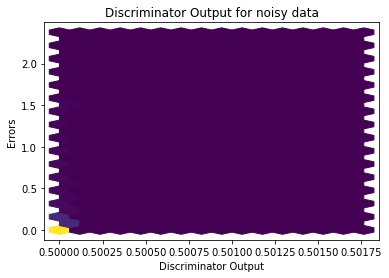

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0882]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection


Parameter containing:
tensor([[0.0019]], requires_grad=True)
